# IRRADIANCIA RESUELTA ESPECTRALMENTE

In [55]:
from pvlib import spectrum, solarposition, irradiance, atmosphere
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

Se presentan todas las caracteristicas necesarias para concoer la irradiancia espectral

In [29]:
caracteristics={
    'lat':40.544,
    'lon':-3.613,
    'tz':'Europe/Madrid',
    'date':'2021-12-21 8:00',
    'pressure':94800,
    'water_vapor_content':0.5,
    'tau500':0.1,
    'ozone':0.31,
    'albedo':0.2,
    }
caracteristics_module={    
    'tilt':20,
    'surface_azimuth':180,
    'radius':0.6,
    'area':179*10**-6
    }


In [30]:
times = pd.date_range(caracteristics['date'], freq='60min', periods=12,tz=caracteristics['tz'])
solpos = solarposition.get_solarposition(times, caracteristics['lat'], caracteristics['lon'])
aoi = irradiance.aoi(caracteristics_module['tilt'], caracteristics_module['surface_azimuth'], solpos.apparent_zenith, solpos.azimuth)
relative_airmass = atmosphere.get_relative_airmass(solpos.apparent_zenith,model='kasten1966')

In [31]:
spectra = spectrum.spectrl2(
    apparent_zenith=solpos.apparent_zenith,
    aoi=aoi,
    surface_tilt=caracteristics_module['tilt'],
    ground_albedo=caracteristics['albedo'],
    surface_pressure=caracteristics['pressure'],
    relative_airmass=relative_airmass,
    precipitable_water=caracteristics['water_vapor_content'],
    ozone=caracteristics['ozone'],
    aerosol_turbidity_500nm=caracteristics['tau500'],
)

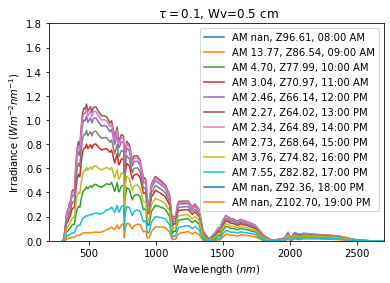

In [32]:
plt.figure()
plt.plot(spectra['wavelength'], spectra['poa_global'])
plt.xlim(200, 2700)
plt.ylim(0, 1.8)
plt.title(r" $\tau=0.1$, Wv=0.5 cm")
plt.ylabel(r"Irradiance ($W m^{-2} nm^{-1}$)")
plt.xlabel(r"Wavelength ($nm$)")

time_labels = times.strftime("%H:%M %p")
labels = [
    "AM {:0.02f}, Z{:0.02f}, {}".format(*vals)
    for vals in zip(relative_airmass, solpos.apparent_zenith, time_labels)
]
plt.legend(labels)
plt.show()

# CURVA FOTOPICA VALORES

In [63]:

effic=[0.000039,0.000120,0.000396,0.001210,0.004000,0.011600,0.023000,0.038000,0.060000,0.090980,0.139020,0.208020,0.32300,0.444310, 0.503000,0.710000,0.862000,0.954000,0.994950,1.000000,0.995000,0.952000,0.870000,0.757000,0.631000,0.503000,0.381000,0.265000,0.175000, 0.107000,0.061000,0.032000,0.017000,0.008210,0.004102,0.002091,0.001047,0.000520,0.000249,0.000120,0.000060,0.000030]
wave_len=[380,390,400,410,420,430,440,450,460,470,480,490,500,507,510, 520, 530, 540, 550,555,560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770]

effic_=pd.Series(effic)
effic_.index=wave_len


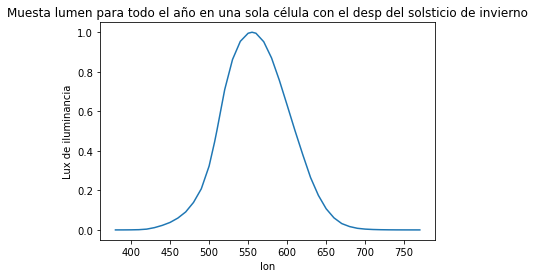

In [64]:
effic_.plot()
plt.xlabel('lon')
plt.ylabel('Lux de iluminancia')
plt.title("Muesta lumen para todo el año en una sola célula con el desp del solsticio de invierno")
plt.show()

In [65]:
photopic_curve=interp(wave_len,effic,k=3)

# USO CURVA FOTOPICA CON LA IRRADIANCIA ESPECTRAL

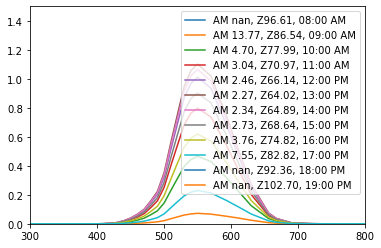

In [72]:
illum=[]
for i in range(len(spectra['poa_global'])):
    illum.append(spectra['poa_global'][i]*photopic_curve(spectra['wavelength'][i]))

plt.figure()
plt.plot(spectra['wavelength'], illum)
plt.xlim(300, 800)
plt.ylim(0, 1.5)
time_labels = times.strftime("%H:%M %p")
labels = [
    "AM {:0.02f}, Z{:0.02f}, {}".format(*vals)
    for vals in zip(relative_airmass, solpos.apparent_zenith, time_labels)
]
plt.legend(labels)
plt.show()